<a href="https://colab.research.google.com/github/scadriano/lia1_2024_2/blob/main/Construindo%20Modelo%20com%20TensorFlow/Construindo_um_modelo_com_TensorFlow_Dogs%26Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Construindo um Modelo com Tensorflow -  🐶 🐱!**

**Problema: uma imagem, dizer se é um dog ou um cat.**

Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

* **Treinamento**: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
* **Teste**: 1.000 imagens de dogs e cats.

Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Por fim, o modelo de duas camadas de convolução seguidas de pooling, a camada de flattening, e as camadas totalmente conectadas (Dense), com a função de ativação sigmoid para a saída binária.

**Não há mágica. Há matemática!** 🧙

**Fonte de dados**

O Kaggle oferece diversos datasets públicos que podem ser usados para você desenvolver seus projetos e incluir no seu portfólio, uma excelente forma de demonstrar suas habilidades em Data Science e Machine Learning. Usaremos como fonte de dados, o famoso [dataset Dogs and Cats](https://www.kaggle.com/c/dogs-vs-cats/data).

**Carregando os dados de Treino e Teste**

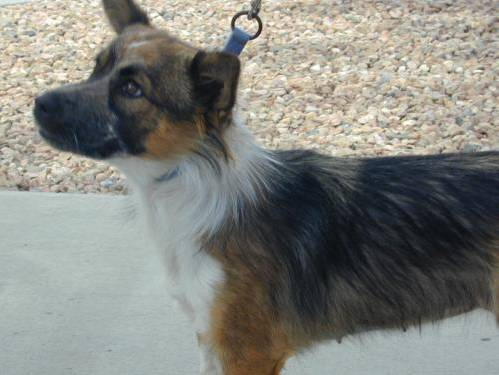

In [ ]:
from IPython.display import Image
Image(filename = '/content/drive/MyDrive/Colab_Notebooks_2024_2/Aula 10 - Construindo um modelo com TensorFlow - Dogs&Cats/dataset_treino/dogs/dog.3.jpg')

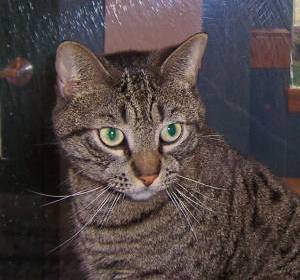

In [ ]:
Image(filename = '/content/drive/MyDrive/Colab_Notebooks_2024_2/Aula 10 - Construindo um modelo com TensorFlow - Dogs&Cats/dataset_treino/cats/cat.1.jpg')

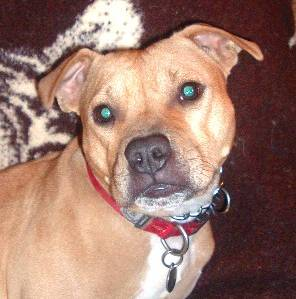

In [ ]:
Image(filename = '/content/drive/MyDrive/Colab_Notebooks_2024_2/Aula 10 - Construindo um modelo com TensorFlow - Dogs&Cats/dataset_teste/2.jpg')

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.

In [ ]:
import tensorflow as tf

In [ ]:
import keras as K

In [ ]:
# Importar K e suas funções necessárias
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [ ]:
# 32 features; formato 3x3; Imagens 64x64; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks_2024_2/Aula 10 - Construindo um modelo com TensorFlow - Dogs&Cats/dataset_treino',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1002 images belonging to 2 classes.


**Treinamento do Modelo**

In [ ]:
# Executando o treinamento
classifier.fit(training_set,
               steps_per_epoch=5,
               epochs=25)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 141s 12s/step - accuracy: 0.4187 - loss: 0.9067
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 6s/step - accuracy: 0.4810 - loss: 0.7112
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 6s/step - accuracy: 0.5484 - loss: 0.6927
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.5429 - loss: 0.6899
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - accuracy: 0.5926 - loss: 0.6828
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4630 - loss: 0.7008
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5312 - loss: 0.6852
Epoch 8/25


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 68s 6s/step - accuracy: 0.5260 - loss: 0.6868
Epoch 9/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5732 - loss: 0.6903
Epoch 10/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5933 - loss: 0.6835
Epoch 11/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5561 - loss: 0.6864
Epoch 12/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5628 - loss: 0.6880
Epoch 13/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4819 - loss: 0.6926
Epoch 14/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4750 - loss: 0.6959
Epoch 15/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 690ms/step - accuracy: 0.6254 - loss: 0.6808
Epoch 16/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 638ms/step - accuracy: 0.5926 - loss: 0.6768
Epoch 17/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 970ms/step - accuracy: 0.5499 - loss: 0.6847
Epoch 18/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.5822 - loss: 0.6837
Epoch 19/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 608ms/step - accuracy: 0.5619 - loss: 0.6720
Epoch 20

Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.

**Teste do Modelo**

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação se a imagem é de um gato ou cachorro.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Previsão: Cachorro.
Acurácia: 100.0 %.


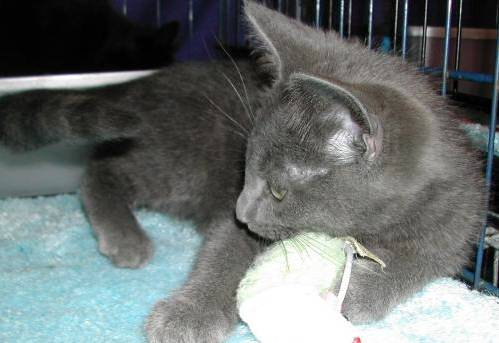

In [ ]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img('/content/drive/MyDrive/Colab_Notebooks_2024_2/Aula 10 - Construindo um modelo com TensorFlow - Dogs&Cats/dataset_teste/100.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='/content/drive/MyDrive/Colab_Notebooks_2024_2/Aula 10 - Construindo um modelo com TensorFlow - Dogs&Cats/dataset_teste/100.jpg')


**O modelo recebeu uma imagem que nunca tinha visto antes e com base no que aprendeu durante o treinamento, foi capaz de classificar.**

Convertemos a imagem de teste em um vetor de pixels e apresentamos ao modelo.
O modelo compara o vetor da imagem de teste com seus pesos e então emite a classificação.

**Melhorias adicionais para este modelo:**

*   Aumentar o número de épocas para 25 para uma aprendizagem mais profunda.
*   aumentar o redimensionamento da imagem de 64x64 para 256x256.
*   Aumentar o tamanho do lote de 32 para 64.
*   Alterar a arquitetura da rede incluindo mais uma camada convolucional.
*   Avaliar outras métricas do modelo e ajustar os hiperparâmetros de acordo.
*   Experimentar outros algoritmos de otimização.








Fim! 🔥